<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [5]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

In [6]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [7]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

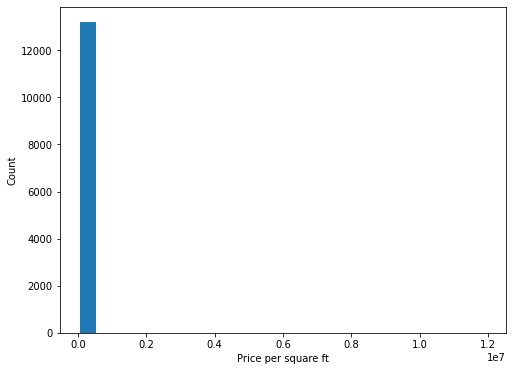

In [8]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

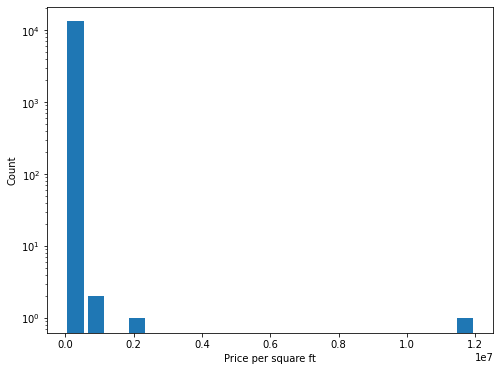

In [9]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [10]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [11]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1005,other,1 BHK,15.0,1.0,30.0,1,200000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7012,other,1 BHK,650.0,1.0,500.0,1,76923
12355,other,4 BHK,16335.0,4.0,149.0,4,912
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [12]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [13]:
df.shape

(13200, 7)

In [14]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [15]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [16]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
3500,Kundalahalli,1 BHK,2400.0,1.0,650.0,1,27083
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246


In [17]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [18]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

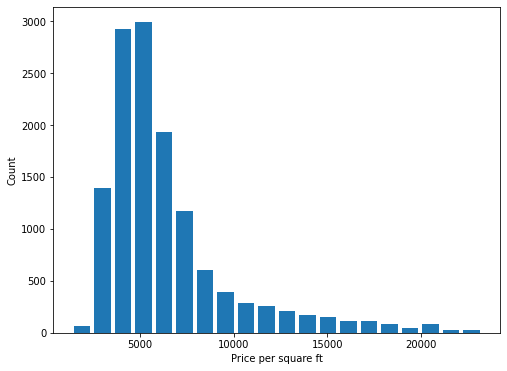

In [19]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

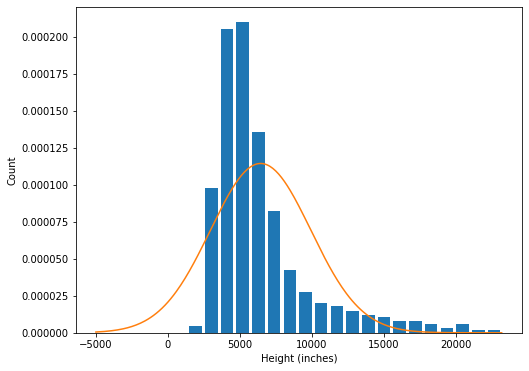

In [21]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [22]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-22-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9382,Marathahalli,4 BHK,2500.0,5.0,181.0,4,7240,0.139180
9012,other,2 BHK,1280.0,2.0,75.0,2,5859,-0.194313
7346,Marathahalli,3 BHK,1730.0,3.0,115.0,3,6647,-0.004022
11672,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382,-0.068016
8719,Whitefield,3 BHK,1770.0,4.0,68.0,3,3841,-0.681632
12478,other,5 Bedroom,1200.0,5.0,130.0,5,10833,1.006840
11643,Ambalipura,3 BHK,1650.0,3.0,100.0,3,6060,-0.145774
2759,Whitefield,3 BHK,1800.0,3.0,110.0,3,6111,-0.133458
9169,Whitefield,3 BHK,1655.0,3.0,108.0,3,6525,-0.033483
5957,Hulimavu,5 Bedroom,1200.0,5.0,101.0,5,8416,0.423168


In [23]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [24]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423,4.530126
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166,5.434010
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042,6.852983
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333,4.025420
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750,4.126120


In [25]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [26]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation